![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importación librerías
import pandas as pd
import numpy as np

In [4]:
# 01_carga_exploracion.py

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Carga de los datos
df_train = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

# 🔎 Exploración inicial
print(f"🧹 Dataset de entrenamiento: {df_train.shape} registros")
print(f"🧹 Dataset de prueba: {df_test.shape} registros")
print("\n📋 Columnas disponibles:")
print(df_train.columns.tolist())

# Vista rápida de los primeros registros
df_train.head()


🧹 Dataset de entrenamiento: (79800, 21) registros
🧹 Dataset de prueba: (34200, 19) registros

📋 Columnas disponibles:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'popularity']


Unnamed: 0                track_id            artists  \
0           0  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1           1  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2           2  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3           3  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           4  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     1       0.0549      0.000058   
1     False         0.287  0.1900    7  ...     0       0.0370      0.930000   
2     False         0.583  0.5090    1  ...     1       0.0362      0.777000   
3     False         0.163  0.0368    8  ...     1       0.0472      0.991000   
4     False         0.647  0.9210    2  ...     1       0.1850      0.000939   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.056700    0.4640   0.3200  141.793               4         goth   
1          0.000356    0.0834   0.1330   83.685               4        opera   
2          0.202000    0.1150   0.5440   90.459               3          idm   
3          0.899000    0.1070   0.0387   69.442               3    classical   
4          0.371000    0.1310   0.1710  137.981               4       techno   

  popularity  
0         22  
1         22  
2         37  
3          0  
4         27  

[5 rows x 21 columns]

In [5]:
df=df_train.copy()

🔍 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valen

count           mean            std           min  \
Unnamed: 0        79800.0   39899.500000   23036.420078      0.000000   
duration_ms       79800.0  227902.192506  105059.883967  13386.000000   
danceability      79800.0       0.567318       0.173110      0.000000   
energy            79800.0       0.641529       0.251441      0.000019   
key               79800.0       5.307043       3.562186      0.000000   
loudness          79800.0      -8.263741       5.035504    -49.307000   
mode              79800.0       0.637732       0.480659      0.000000   
speechiness       79800.0       0.084750       0.105657      0.000000   
acousticness      79800.0       0.314979       0.332512      0.000000   
instrumentalness  79800.0       0.157319       0.310792      0.000000   
liveness          79800.0       0.213313       0.190075      0.000000   
valence           79800.0       0.474267       0.259010      0.000000   
tempo             79800.0     122.076559      29.941937      0.000000   
time_signature    79800.0       3.902556       0.434284      0.000000   
popularity        79800.0      33.265301      22.330871      0.000000   

                           25%            50%          75%          max  
Unnamed: 0         19949.75000   39899.500000   59849.2500    79799.000  
duration_ms       174436.00000  212813.000000  261426.0000  5237295.000  
danceability           0.45600       0.581000       0.6950        0.985  
energy                 0.47200       0.685000       0.8540        1.000  
key                    2.00000       5.000000       8.0000       11.000  
loudness             -10.00600      -7.012000      -5.0000        4.532  
mode                   0.00000       1.000000       1.0000        1.000  
speechiness            0.03590       0.049000       0.0845        0.965  
acousticness           0.01700       0.169000       0.5980        0.996  
instrumentalness       0.00000       0.000041       0.0505        1.000  
liveness               0.09790       0.132000       0.2730        1.000  
valence                0.26100       0.464000       0.6840        0.995  
tempo                 99.08125     122.009000     140.0540      222.605  
time_signature         4.00000       4.000000       4.0000        5.000  
popularity            17.00000      35.000000      50.0000      100.000

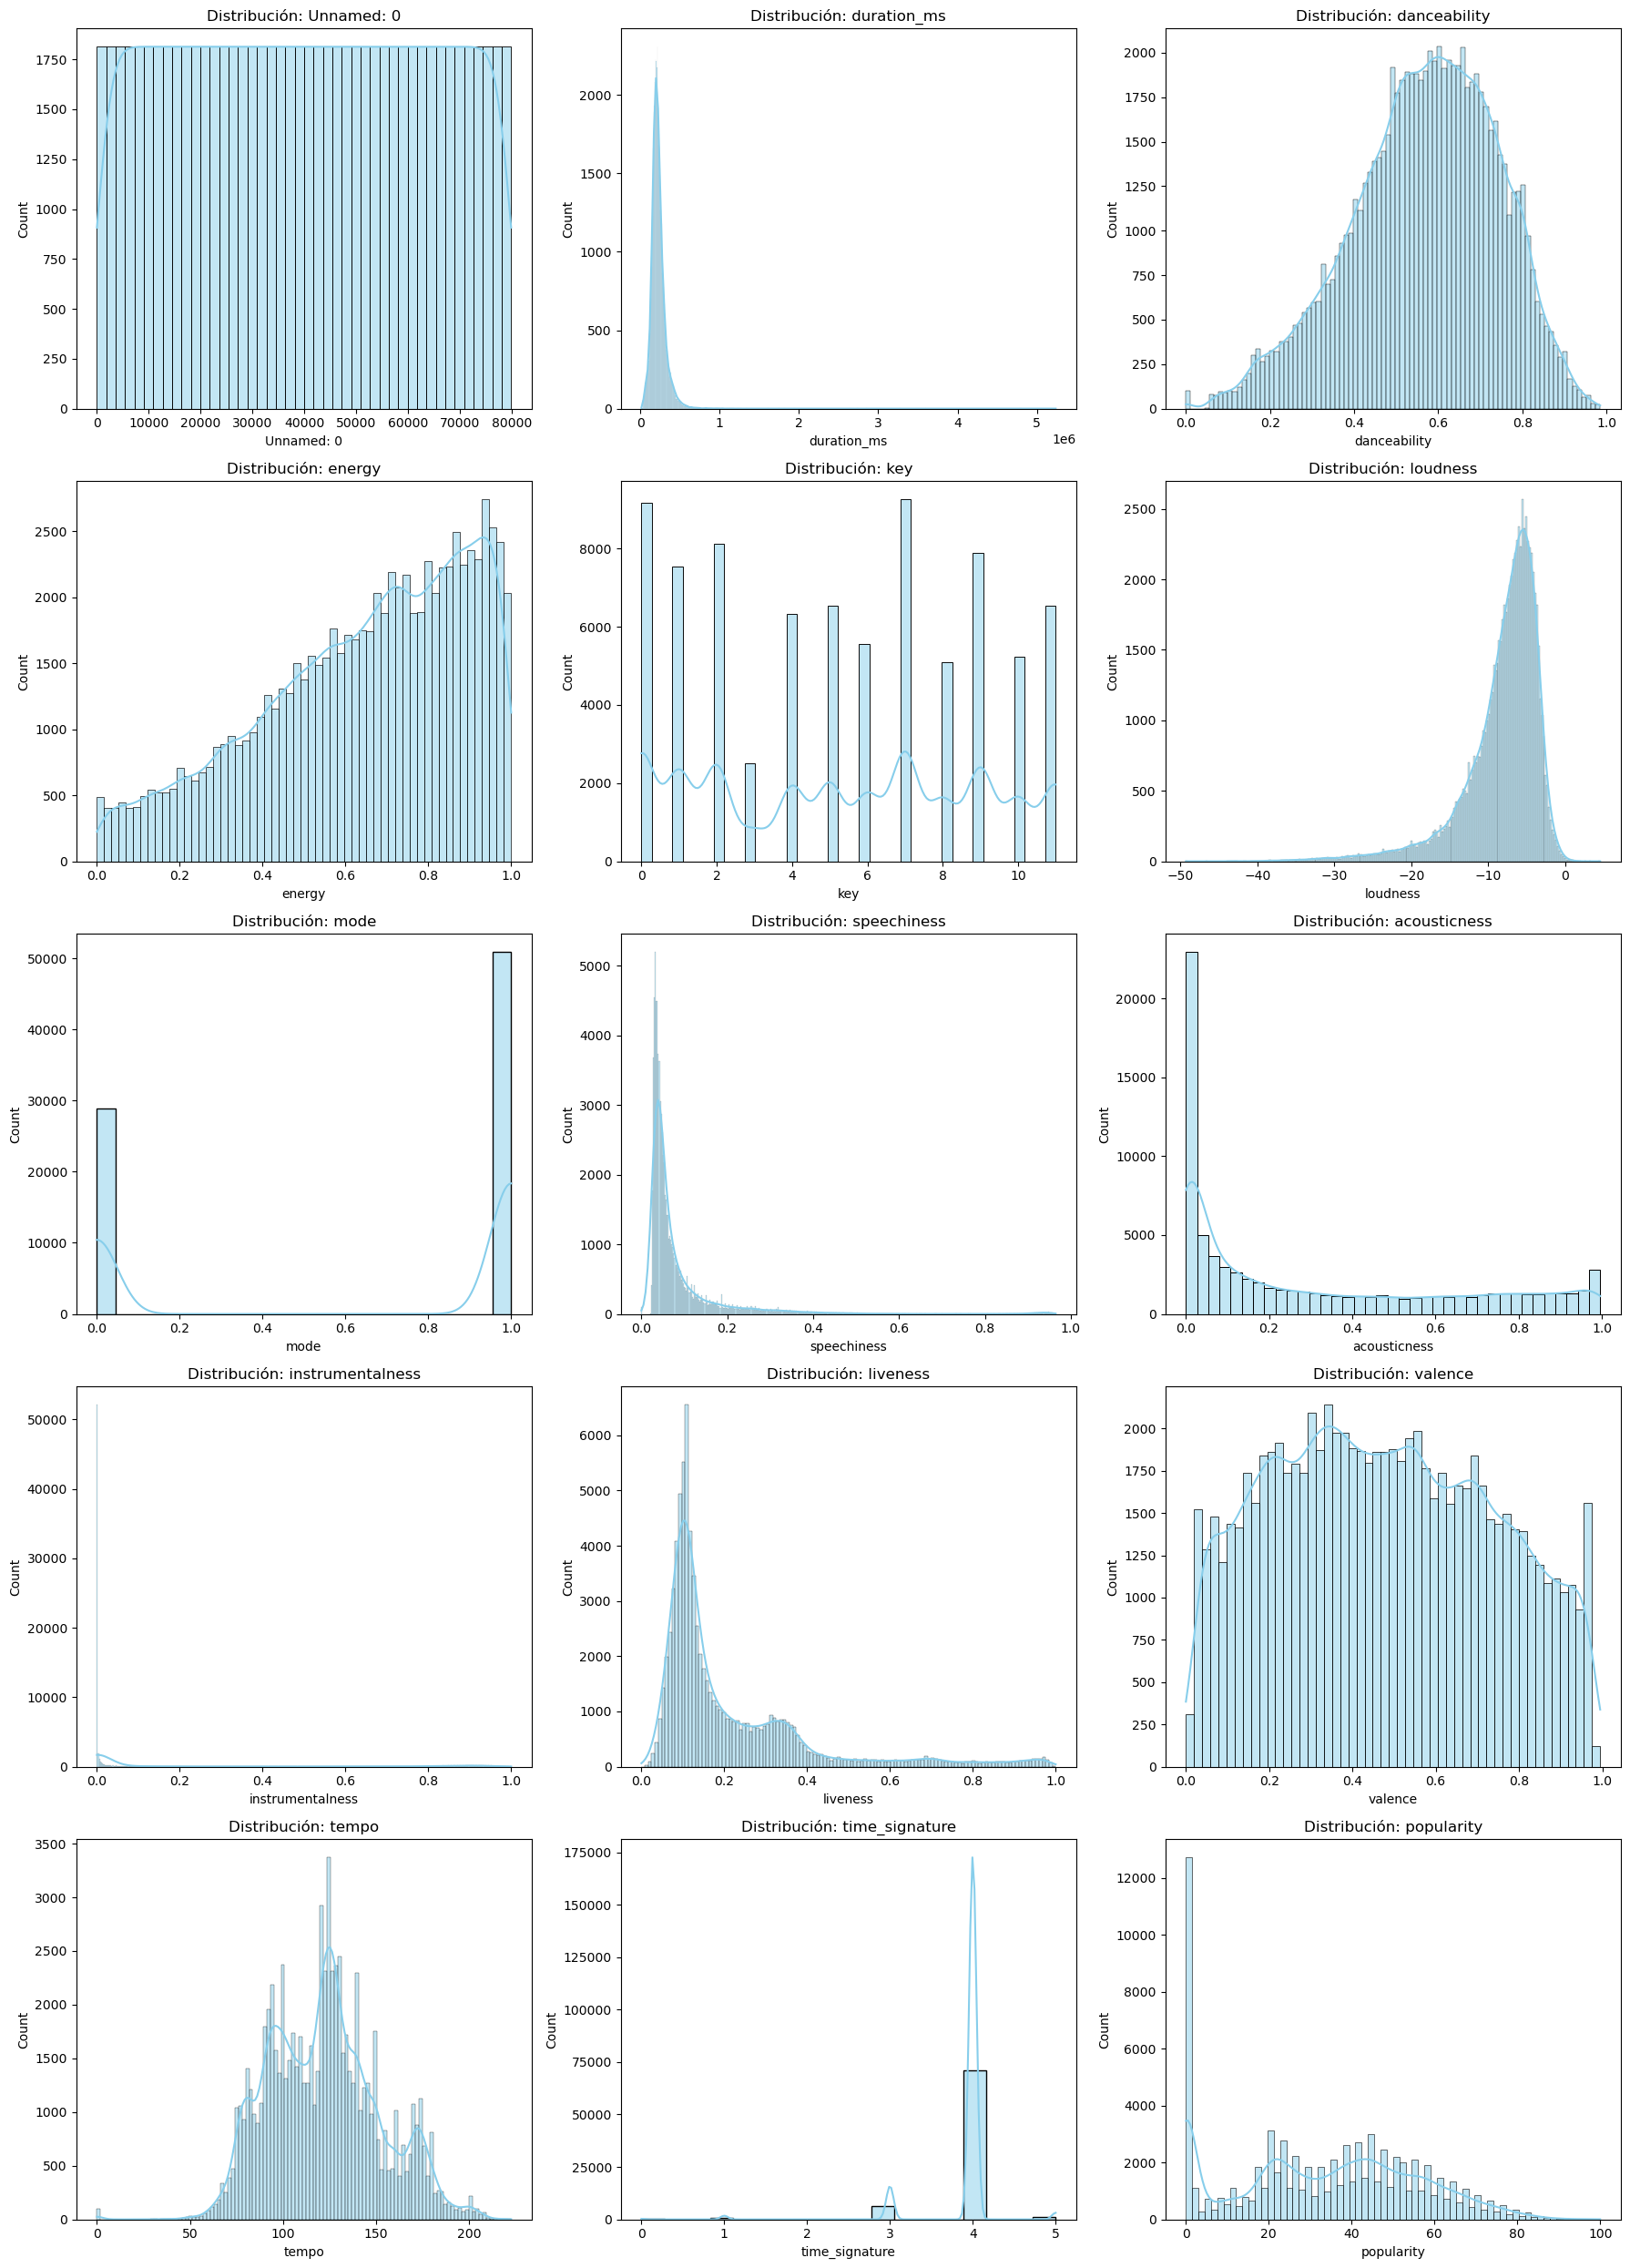


🎶 Distribución de valores únicos en: track_id
track_id
5ftfVzSLIi5ZxYdNbRtf41    7
0WaaPFt4Qy8sVfxKz43bCD    6
434VcYrm3FPRRiW4jw5nLb    6
6bzWr3EpSEolVwlbLk58il    6
1uOe9m9bAiAY4kGnGDu1Ns    6
7uhINGViZPygI2AljxO8KN    6
3dAiWRwZXd8pEOhItkkZXb    6
4sO9tnvCH3DJZ3AAXoixjd    6
0P9Kg7MUJ8ygcKSOPh1LfJ    6
09IStsImFySgyp0pIQdqAc    6
Name: count, dtype: int64

🎶 Distribución de valores únicos en: artists
artists
The Beatles        194
George Jones       185
Stevie Wonder      174
Linkin Park        154
Prateek Kuhad      154
Feid               143
Ella Fitzgerald    139
Chuck Berry        139
OneRepublic        134
Håkan Hellström    127
Name: count, dtype: int64

🎶 Distribución de valores únicos en: album_name
album_name
Alternative Christmas 2022     131
Feliz Cumpleaños con Perreo    124
Metal                           97
Halloween con perreito          91
Halloween Party 2022            89
The Complete Hank Williams      76
Fiesta portatil                 76
Queda poco para la PAES

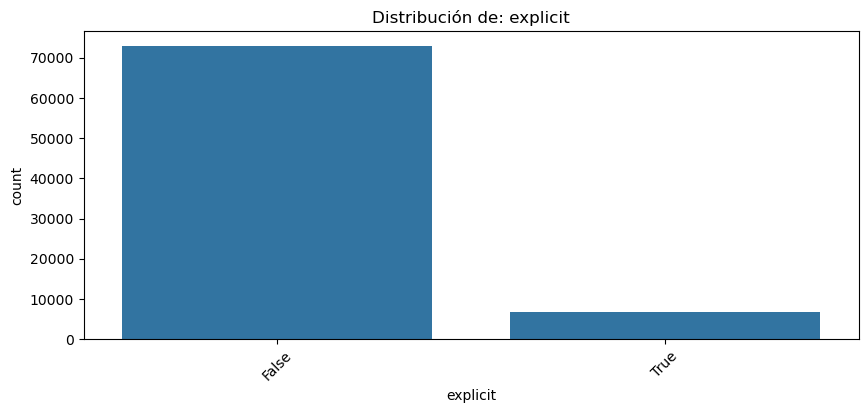


🎶 Distribución de valores únicos en: track_genre
track_genre
progressive-house    738
sad                  737
world-music          729
singer-songwriter    727
swedish              726
ambient              725
anime                723
soul                 722
trance               721
salsa                721
Name: count, dtype: int64


In [6]:
# 3. Tipos de variable y valores nulos
# ================================
print("🔍 Información general del dataset:")
print(df.info())
print("\n📉 Valores nulos por columna:")
print(df.isnull().sum())

# ================================
# 4. División de columnas
# ================================
id_cols = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print("\n📌 Columnas numéricas:", num_cols)
print("📌 Columnas categóricas:", cat_cols)

# ================================
# 5. Estadísticas descriptivas
# ================================
print("\n📊 Resumen estadístico de variables numéricas:")
display(df[num_cols].describe().T)

# ================================
# 6. Gráficos de distribución numéricas
# ================================
import math
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución: {col}', fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ================================
# 7. Gráficos de categóricas (solo si hay pocas categorías)
# ================================
for col in cat_cols:
    print(f"\n🎶 Distribución de valores únicos en: {col}")
    print(df[col].value_counts().head(10))
    if df[col].nunique() <= 30:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
        plt.xticks(rotation=45)
        plt.title(f'Distribución de: {col}')
        plt.show()

PREPROCESAMIENTO BASE 

Preprocesamiento y seleccion de variables.

In [7]:
# 02_preprocesamiento_base.py

# Copia de seguridad del dataset
df_model = df_train.copy()

# 1. Eliminar columnas que no agregan valor directamente
df_model.drop(columns=["Unnamed: 0", "track_id"], inplace=True)

# 2. Variables derivadas sencillas
df_model['track_name_length'] = df_model['track_name'].apply(lambda x: len(str(x)))
df_model['track_name_word_count'] = df_model['track_name'].apply(lambda x: len(str(x).split()))

# 3. Popularidad promedio por álbum
album_avg_popularity = df_model.groupby('album_name')['popularity'].mean()
df_model['album_avg_popularity'] = df_model['album_name'].map(album_avg_popularity)

# 4. Popularidad promedio por artista principal
df_model['main_artist'] = df_model['artists'].apply(lambda x: str(x).split(";")[0])
artist_avg_popularity = df_model.groupby('main_artist')['popularity'].mean()
df_model['artist_avg_popularity'] = df_model['main_artist'].map(artist_avg_popularity)

# 5. Limpieza de columnas textuales
df_model.drop(columns=["track_name", "album_name", "artists", "main_artist"], inplace=True)

# 6. Conversión de explícito a binario
df_model['explicit'] = df_model['explicit'].astype(int)

# 7. Codificación one-hot de género musical
df_model = pd.get_dummies(df_model, columns=["track_genre"], drop_first=True)

print(f" Preprocesamiento base terminado: {df_model.shape} variables disponibles.")


 Preprocesamiento base terminado: (79800, 132) variables disponibles.


**Manejo de outliers**

In [8]:
# 03_outliers_handling.py

# Función auxiliar para hacer clipping robusto
def clip_outliers(df, column, lower_percentile=0.5, upper_percentile=99.5):
    lower = np.percentile(df[column], lower_percentile)
    upper = np.percentile(df[column], upper_percentile)
    df[column] = np.clip(df[column], lower, upper)
    print(f" Clipping en '{column}': [{lower:.2f}, {upper:.2f}]")
    return df

# Copia de seguridad antes del tratamiento de outliers
df_model_outliers = df_model.copy()

# 📈 Aplicar clipping controlado a las variables sensibles
outlier_columns = ['duration_ms', 'loudness', 'tempo']

for col in outlier_columns:
    df_model_outliers = clip_outliers(df_model_outliers, col)

print(f"\n Manejo de outliers completado. Shape final: {df_model_outliers.shape}")

 Clipping en 'duration_ms': [53372.80, 602453.39]
 Clipping en 'loudness': [-31.20, -1.15]
 Clipping en 'tempo': [60.88, 200.04]

 Manejo de outliers completado. Shape final: (79800, 132)


In [9]:
# 04_division_escalado.py

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 📈 Separar variables predictoras y variable objetivo
X = df_model_outliers.drop(columns=['popularity'])
y = df_model_outliers['popularity']

# 🔀 División entrenamiento/validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f" División realizada:")
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}")

# ⚖️ Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f" Escalado realizado.")


 División realizada:
Train set: (59850, 131), Validation set: (19950, 131)
 Escalado realizado.


**MODELOS BASE Y CALIBRACIÓN EXTENDIDA**

In [8]:
# 05_modelado_calibracion.py

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import pandas as pd
import numpy as np

# 📋 Definición de modelos y grillas de búsqueda
modelos_param = {
    "Decision Tree": (DecisionTreeRegressor(random_state=42), {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5]
    }),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }),
    "XGBoost": (XGBRegressor(random_state=42, verbosity=0), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }),
    "LightGBM": (LGBMRegressor(random_state=42, verbose=-1), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 10, 15],
        'subsample': [0.8, 1.0]
    }),
}

# 📈 Entrenamiento y calibración
resultados = []
mejores_modelos = {}

for nombre, (modelo, param_grid) in modelos_param.items():
    print(f"\n🔍 Calibrando: {nombre}")
    start_time = time.time()

    grid = GridSearchCV(
        estimator=modelo,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    try:
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
        mejores_modelos[nombre] = best_model

        pred = best_model.predict(X_val_scaled)
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        mae = mean_absolute_error(y_val, pred)
        r2 = r2_score(y_val, pred)

        resultados.append({
            "Modelo": nombre,
            "Mejores parámetros": grid.best_params_,
            "RMSE": rmse,
            "MAE": mae,
            "R²": r2,
            "Tiempo (s)": round(time.time() - start_time, 2)
        })

        print(f"✅ {nombre} terminado — RMSE: {rmse:.4f}, R²: {r2:.4f}")

    except Exception as e:
        print(f"❌ Error en {nombre}: {e}")

# 📊 Resultados de la calibración
df_resultados = pd.DataFrame(resultados).sort_values(by='RMSE').reset_index(drop=True)

print("\n📋 Comparativa de modelos calibrados:\n")
print(df_resultados)



🔍 Calibrando: Decision Tree
Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Decision Tree terminado — RMSE: 4.5375, R²: 0.9583

🔍 Calibrando: Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Random Forest terminado — RMSE: 4.4956, R²: 0.9590

🔍 Calibrando: Gradient Boosting
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Gradient Boosting terminado — RMSE: 4.1874, R²: 0.9645

🔍 Calibrando: XGBoost
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ XGBoost terminado — RMSE: 4.1582, R²: 0.9650

🔍 Calibrando: LightGBM
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ LightGBM terminado — RMSE: 4.2184, R²: 0.9639

📋 Comparativa de modelos calibrados:

              Modelo                                 Mejores parámetros  \
0            XGBoost  {'colsample_bytree': 1.0, 'learning_rate': 0.0...   
1  Gradient Boosting  {'learning_rate': 0.05, 'max_depth': 7, 'n_est...   
2           LightGBM  {'learni

In [9]:
# 06_ensambles.py

from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import Ridge

# 🏆 Seleccionar los 4 mejores modelos
top4_modelos = df_resultados.loc[:3, 'Modelo'].values
print(f"🏆 Modelos seleccionados para ensambles: {top4_modelos.tolist()}")

# 🔹 1. StackingRegressor
estimadores_top4 = [(nombre.lower().replace(" ", "_"), mejores_modelos[nombre]) for nombre in top4_modelos]

stacking_top4 = StackingRegressor(
    estimators=estimadores_top4,
    final_estimator=Ridge(alpha=1.0),
    passthrough=True,
    n_jobs=-1
)

stacking_top4.fit(X_train_scaled, y_train)
stack_pred = stacking_top4.predict(X_val_scaled)

print("\n Resultados del Stacking con Top 4:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, stack_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_val, stack_pred):.4f}")
print(f"R²: {r2_score(y_val, stack_pred):.4f}")

# 🔹 2. VotingRegressor ponderado
# Asignar pesos inversamente proporcionales al RMSE
pesos = 1 / df_resultados.loc[:3, 'RMSE'].values
pesos /= pesos.sum()  # Normalizar

voting_top4 = VotingRegressor(
    estimators=[(nombre.lower().replace(" ", "_"), mejores_modelos[nombre]) for nombre in top4_modelos],
    weights=pesos
)

voting_top4.fit(X_train_scaled, y_train)
voting_pred = voting_top4.predict(X_val_scaled)

print("\n Resultados del VotingRegressor Ponderado:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, voting_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_val, voting_pred):.4f}")
print(f"R²: {r2_score(y_val, voting_pred):.4f}")

# 🔹 3. Blending simple (promedio de predicciones)
predicciones_blending = []

for nombre in top4_modelos:
    modelo = mejores_modelos[nombre]
    pred = modelo.predict(X_val_scaled)
    predicciones_blending.append(pred)

blend_pred = np.mean(predicciones_blending, axis=0)

print("\n Resultados del Blending Promedio Simple:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, blend_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_val, blend_pred):.4f}")
print(f"R²: {r2_score(y_val, blend_pred):.4f}")


🏆 Modelos seleccionados para ensambles: ['XGBoost', 'Gradient Boosting', 'LightGBM', 'Random Forest']

🎯 Resultados del Stacking con Top 4:
RMSE: 4.1052
MAE: 2.1098
R²: 0.9658

🎯 Resultados del VotingRegressor Ponderado:
RMSE: 4.1326
MAE: 2.1305
R²: 0.9654

🎯 Resultados del Blending Promedio Simple:
RMSE: 4.1331
MAE: 2.1374
R²: 0.9654


In [12]:
# 07_cross_validation_robusta.py

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📋 Configuración de KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ⚙️ Preparar dataset de test igual que train

# 1. Copiar test
dataTesting_fe = df_test.copy()

# 2. Variables derivadas
dataTesting_fe['track_name_length'] = dataTesting_fe['track_name'].apply(lambda x: len(str(x)))
dataTesting_fe['track_name_word_count'] = dataTesting_fe['track_name'].apply(lambda x: len(str(x).split()))

# 3. 🛠 CORREGIR: Crear main_artist en df_train si no existe
if 'main_artist' not in df_train.columns:
    df_train['main_artist'] = df_train['artists'].apply(lambda x: str(x).split(";")[0])

# 4. Popularidad promedio por álbum y artista
dataTesting_fe['album_avg_popularity'] = df_train.groupby('album_name')['popularity'].mean().reindex(dataTesting_fe['album_name']).values
dataTesting_fe['main_artist'] = dataTesting_fe['artists'].apply(lambda x: str(x).split(";")[0])
dataTesting_fe['artist_avg_popularity'] = df_train.groupby('main_artist')['popularity'].mean().reindex(dataTesting_fe['main_artist']).values

# 5. Variables adicionales
dataTesting_fe['explicit'] = dataTesting_fe['explicit'].astype(int)

# 6. Eliminar columnas textuales
dataTesting_fe.drop(columns=["track_id", "track_name", "album_name", "artists", "main_artist"], inplace=True)

# 7. One-hot encoding de género musical
dataTesting_fe = pd.get_dummies(dataTesting_fe, columns=['track_genre'], drop_first=True)

# 8. Alinear columnas con X (del train)
dataTesting_fe = dataTesting_fe.reindex(columns=X.columns, fill_value=0)

# 9. Imputar valores faltantes
dataTesting_fe.fillna(X.mean(), inplace=True)

# 10. Escalado global para train y test
scaler_total = StandardScaler()
scaler_total.fit(X)  # ajustamos scaler sobre todo X

X_scaled = scaler_total.transform(X)
X_test_fe_scaled = scaler_total.transform(dataTesting_fe)

# ⚙️ Inicializar matrices para predicciones
oof_predictions = np.zeros(X.shape[0])
test_predictions = np.zeros(X_test_fe_scaled.shape[0])

# 🔁 Cross-validation fold-by-fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled)):
    print(f"\n🔁 Fold {fold+1}")

    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    # 📚 Entrenar el mejor ensamble
    modelo_fold = stacking_top4  # También podrías usar voting_top4 o blending_top4
    modelo_fold.fit(X_train_fold, y_train_fold)
    
    # 📈 Predicciones
    oof_predictions[val_idx] = modelo_fold.predict(X_val_fold)
    test_predictions += modelo_fold.predict(X_test_fe_scaled) / kf.n_splits

# 📋 Evaluación final OOF
print("\n📈 Evaluación usando predicciones OOF:")
print(f"RMSE OOF: {np.sqrt(mean_squared_error(y, oof_predictions)):.4f}")
print(f"MAE OOF: {mean_absolute_error(y, oof_predictions):.4f}")
print(f"R² OOF: {r2_score(y, oof_predictions):.4f}")



🔁 Fold 1

🔁 Fold 2

🔁 Fold 3

🔁 Fold 4

🔁 Fold 5

📈 Evaluación usando predicciones OOF:
RMSE OOF: 4.0744
MAE OOF: 2.1162
R² OOF: 0.9667


In [15]:
# 08_prediccion_final_kaggle.py

# 📥 Crear el DataFrame de submission
submission_final = pd.DataFrame(
    test_predictions,
    index=dataTesting_fe.index,  # usamos el mismo índice del test mejorado
    columns=['Popularity']
)

# 📤 Exportar a CSV
submission_final.to_csv("test_submission_file.csv", index_label="ID")

# 📋 Vista previa de las primeras filas
print("\n📤 Primeras predicciones generadas para Kaggle:")
print(submission_final.head())

print("\n✅ Archivo test_submission_file.csv generado correctamente para Kaggle 🚀")




📤 Primeras predicciones generadas para Kaggle:
   Popularity
0   47.124378
1   14.425488
2   -0.175117
3    0.168972
4   31.377511

✅ Archivo test_submission_file.csv generado correctamente para Kaggle 🚀
